# Análisis descriptivo de los datos del dataset


Para una correcta ejecución del código se deduce que se tiene instalado <kbd>python3</kbd> y <kbd>jupyter-notebook</kbd> (con las dependencias que estas implican), además se requiere que estén instalados los siguientes paquetes:

-   <kbd>scikit-learn / sklearn</kbd>: Módulo Python para aprendizaje automático
-   <kbd>numpy</kbd>: Procesamiento de matrices para números, cadenas, registros y objetos en Python
-   <kbd>pandas</kbd>: Kit de herramientas de análisis de datos Python flexible y potente
-   <kbd>tensorflow</kbd>: Kit de herramientas para aprendizaje automático a través de un rango de tareas.



### Librerías importadas para la ejecución de la actividad.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import LinearSVC, SVC


### Lectura del DataFrame


In [3]:
df = pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Verificación de datos.

Se hace una verificación de la cantidad de datos que se tiene para obtener datos nulos.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_obj = df.select_dtypes(exclude = ["object"])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_val = df.select_dtypes(exclude = ["int64","float64"])
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Empty DataFrame


En este primer segmento se realizan las siguientes acciones:

-    Visualización de tipos de datos.
-    Exclusión de los datos de tipo categórico.
-    Conteo del número total de los datos.
-    Verificación de datos nulos dentro del DataFrame.

Esto se realiza para eliminar valores que nos puedan generar algún tipo de error o que contengan información sin valor alguno.



Desde un inicio se puede observar que no hay valores de tipo "object", con lo cual procedemos a evaluar si contienen valores "Null". 
Cabe recalcar que se comprueba que no existan valores de tipo "object", haciendo una exclusión de los valores "int/float"


### Descripción de las columnas 

En esta sección se realiza la descripción de valores que pueden aportar indicaciones  de media, moda, máximos, mínimos, etc.


In [7]:
df_obj.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Correlación de los datos.

Se genera una tabla de la correlación que existe entre los datos del DataFrame y se generan mapas para la visualización de los mismos.


In [8]:
df_obj.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


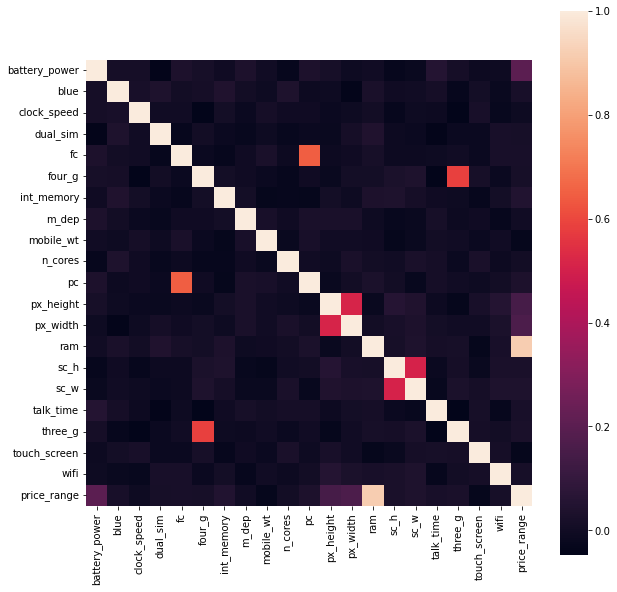

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_obj.corr(), square=True)               
plt.show()

Text(0.5, 1.0, 'Matriz de correlaciones')

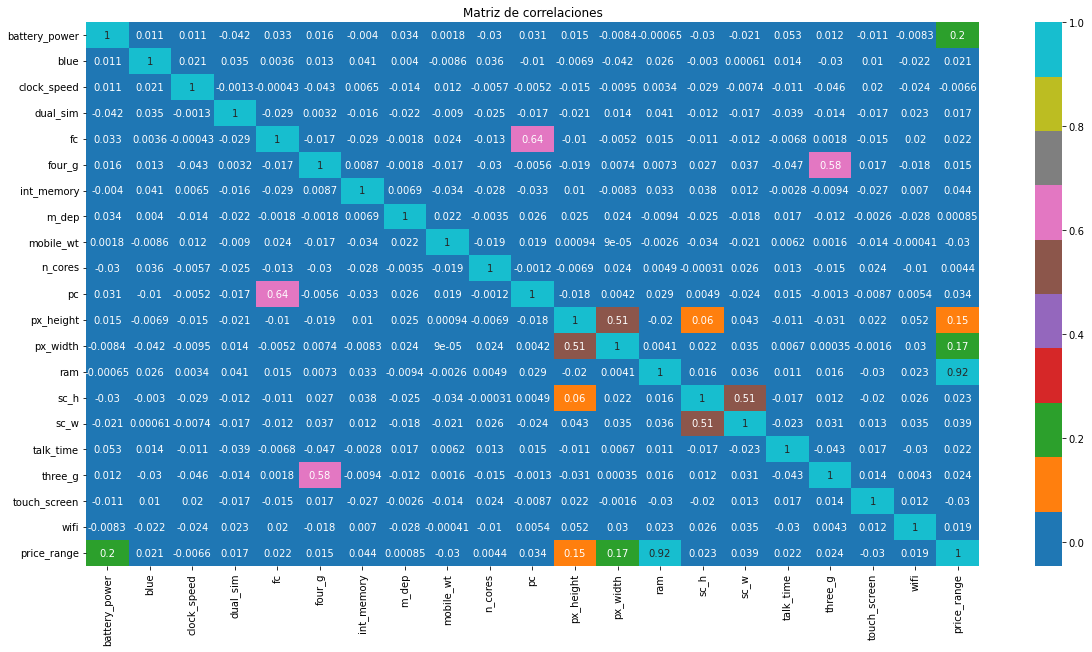

In [10]:
plt.figure(figsize = (20,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="tab10")
heatmap.set_title("Matriz de correlaciones")

### Visualización gráfica de los valores.

Se generan gráficas de barras de las diferentes variables o columnas, contenidas en el DataFrame.

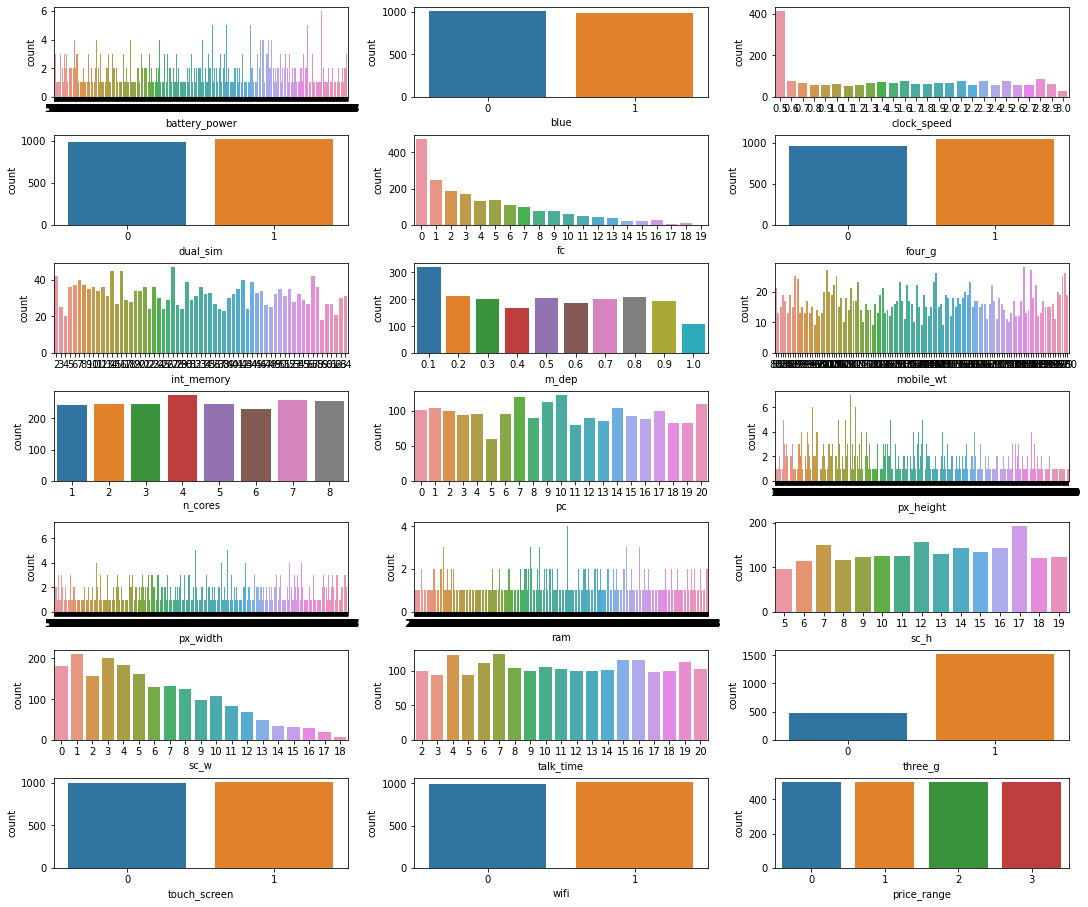

In [11]:
plt.figure(figsize= (15,20), frameon=True,  constrained_layout=True)
for i in enumerate(df):
    plt.subplot(13,3,i[0]+1)
    sns.countplot(x = i[1], data = df)


### Inicio de segmentación de DataFrame

Separamos las variables en 2 partes:
-     Variables para entrenamiento.
-     Variable a comparar o evaluar.


In [12]:
X = df.loc[:, df.columns != "price_range"]
Y = df.loc[:, "price_range"]

### Normalización de los datos.

Se genera la normalización del DataFrame para obtener valores en una escala común y ser más fácil de analizar.

In [13]:
def norm(df,size):
    a = ((df.astype(np.float64) - df.mean().astype(np.float64)) * (df-df.mean().astype(np.float64))).sum().astype(np.float64)
    b = (a / (size)).apply(np.sqrt).astype(np.float64)    
    return ((df-df.mean()) / b).astype(np.float64)

df_norm = norm(X.astype(np.float64), 150)
df_norm

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.247186,-0.271136,0.227518,-0.279115,-0.208818,-0.285902,-0.378105,0.093315,0.369507,-0.301787,-0.357594,-0.385856,-0.314060,0.107272,-0.214977,0.077531,0.400520,-0.489352,-0.275509,0.270054
1,-0.135599,0.276614,-0.343166,0.268706,-0.271914,0.262328,0.316316,0.188293,-0.032880,-0.182054,-0.176911,0.160422,0.466787,0.127980,0.305154,-0.173989,-0.201087,0.153264,0.272223,-0.277723
2,-0.421113,0.276614,-0.343166,0.268706,-0.145721,0.262328,0.135163,0.378248,0.036764,0.057412,-0.176911,0.381402,0.294392,0.120909,-0.084944,-0.236869,-0.100819,0.153264,0.272223,-0.277723
3,-0.388696,0.276614,0.328227,-0.279115,-0.271914,-0.285902,-0.332816,0.283270,-0.071571,0.177145,-0.041399,0.352391,0.338758,0.162829,0.240138,0.140411,-0.000551,0.153264,-0.275509,-0.277723
4,0.363114,0.276614,-0.108178,-0.279115,0.548340,0.262328,0.180451,0.093315,0.005811,-0.301787,0.184455,0.347453,-0.025045,-0.180109,-0.279993,-0.236869,0.199984,0.153264,0.272223,-0.277723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.277109,0.276614,-0.343166,0.268706,-0.271914,0.262328,-0.453585,0.283270,-0.265026,0.177145,0.184455,0.356094,0.404674,-0.367741,0.045089,-0.111109,0.400520,0.153264,0.272223,-0.277723
1996,0.452883,0.276614,0.361797,0.268706,-0.271914,-0.285902,0.104971,-0.286594,0.361769,-0.062321,-0.312424,0.166595,0.452209,-0.023287,-0.084944,0.266171,0.250118,0.153264,0.272223,0.270054
1997,0.419220,-0.271136,-0.208887,0.268706,-0.208818,0.262328,0.059682,0.188293,-0.249549,0.416611,-0.312424,0.137583,0.241153,0.235559,-0.214977,-0.299748,-0.301355,0.153264,0.272223,-0.277723
1998,0.170486,-0.271136,-0.208887,-0.279115,-0.019528,0.262328,0.210644,-0.381572,0.036764,0.057412,-0.222082,-0.190801,-0.368567,-0.316982,0.370171,0.266171,0.400520,0.153264,0.272223,0.270054


### Media y desviación estándar de los datos.

In [14]:
df_norm.mean()

battery_power    6.000755e-17
blue            -1.103562e-16
clock_speed      5.527662e-16
dual_sim        -1.026956e-18
fc               4.294828e-17
four_g           5.601075e-17
int_memory      -5.195844e-17
m_dep           -1.622924e-15
mobile_wt        3.473610e-17
n_cores         -1.217082e-17
pc               2.337019e-17
px_height        3.623490e-17
px_width         1.729172e-17
ram             -5.248579e-17
sc_h             3.266831e-17
sc_w            -1.737499e-17
talk_time        3.305689e-17
three_g         -1.454392e-17
touch_screen     1.199041e-17
wifi            -1.443290e-18
dtype: float64

In [15]:
df_norm.std()

battery_power    0.27393
blue             0.27393
clock_speed      0.27393
dual_sim         0.27393
fc               0.27393
four_g           0.27393
int_memory       0.27393
m_dep            0.27393
mobile_wt        0.27393
n_cores          0.27393
pc               0.27393
px_height        0.27393
px_width         0.27393
ram              0.27393
sc_h             0.27393
sc_w             0.27393
talk_time        0.27393
three_g          0.27393
touch_screen     0.27393
wifi             0.27393
dtype: float64

### Entrenamiento y ejecución.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 456)

Se le da un 25% al conjunto de test y un 75% al conjunto de entrenamiento.

In [17]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1789,583,1,0.9,1,1,0,51,0.9,88,8,2,1658,1794,1799,16,9,7,0,1,0
594,621,1,2.7,1,0,0,54,0.1,151,4,20,434,910,2801,6,1,5,1,1,1
1840,1564,0,1.5,1,1,0,42,0.7,108,2,2,1619,1962,3376,7,0,7,0,1,0
75,819,0,0.6,1,8,1,42,0.9,188,6,20,339,1242,1814,5,4,13,1,0,1
1600,1776,1,2.1,1,10,0,35,0.1,172,4,16,278,623,1813,16,13,20,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0
601,1595,1,0.8,1,0,1,44,0.7,85,4,20,1024,1838,3881,14,10,9,1,0,1
1707,1699,1,0.5,0,16,0,21,0.1,156,4,20,105,1099,1181,16,0,18,1,1,0
613,557,1,1.6,0,0,0,24,0.5,125,3,0,1131,1315,1305,12,8,3,1,0,1


In [18]:
y_train

1789    1
594     2
1840    3
75      1
1600    1
       ..
42      1
601     3
1707    1
613     0
1947    2
Name: price_range, Length: 1500, dtype: int64

In [19]:
enc = OneHotEncoder()
Y = enc.fit_transform(y_train[:, np.newaxis]).toarray()
Y.shape

C:\Users\Giovanni\AppData\Local\Temp/ipykernel_15480/4259303592.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y = enc.fit_transform(y_train[:, np.newaxis]).toarray()


(1500, 4)


Se utiliza la función "OneHotEncoder" para convertir datos categóricos en una forma de arreglo para su posterior uso en las capas ocultas, que se muestran en unos bloques más.


In [20]:
Y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [21]:
df_std = StandardScaler().fit_transform(X_train)
df_std.shape

(1500, 20)

Estandarizamos los valores.

In [22]:
df_std

array([[-1.47613114,  1.01207287, -0.75432815, ..., -1.75387769,
         1.0093773 , -1.02566251],
       [-1.38978066,  1.01207287,  1.45107087, ...,  0.57016519,
         1.0093773 ,  0.97497958],
       [ 0.75307465, -0.98807114, -0.01919514, ..., -1.75387769,
         1.0093773 , -1.02566251],
       ...,
       [ 1.05984609,  1.01207287, -1.24441682, ...,  0.57016519,
         1.0093773 , -1.02566251],
       [-1.53521305,  1.01207287,  0.10332703, ...,  0.57016519,
        -0.99070982,  0.97497958],
       [ 1.262088  , -0.98807114, -1.24441682, ...,  0.57016519,
         1.0093773 , -1.02566251]])

In [23]:
df_std[:, 0].mean()

1.9747166864666117e-16

In [24]:
df_std[:, 0].std()

1.0

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(4, input_dim = 20, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation = tf.nn.softmax))

In [44]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
df_model = model.fit(df_std, Y, epochs = 100)

Epoch 1/100
47/47 [==============================] - 0s 802us/step - loss: 1.7362 - accuracy: 0.2073
Epoch 2/100
47/47 [==============================] - 0s 694us/step - loss: 1.6336 - accuracy: 0.2180
Epoch 3/100
47/47 [==============================] - 0s 607us/step - loss: 1.5574 - accuracy: 0.2293
Epoch 4/100
47/47 [==============================] - 0s 672us/step - loss: 1.5024 - accuracy: 0.2380
Epoch 5/100
47/47 [==============================] - 0s 607us/step - loss: 1.4621 - accuracy: 0.2460
Epoch 6/100
47/47 [==============================] - 0s 629us/step - loss: 1.4315 - accuracy: 0.2567
Epoch 7/100
47/47 [==============================] - 0s 672us/step - loss: 1.4085 - accuracy: 0.2727
Epoch 8/100
47/47 [==============================] - 0s 607us/step - loss: 1.3902 - accuracy: 0.2907
Epoch 9/100
47/47 [==============================] - 0s 607us/step - loss: 1.3746 - accuracy: 0.3080
Epoch 10/100
47/47 [==============================] - 0s 672us/step - loss: 1.3608 - accura

47/47 [==============================] - 0s 672us/step - loss: 0.3326 - accuracy: 0.9547
Epoch 82/100
47/47 [==============================] - 0s 824us/step - loss: 0.3258 - accuracy: 0.9560
Epoch 83/100
47/47 [==============================] - 0s 824us/step - loss: 0.3195 - accuracy: 0.9613
Epoch 84/100
47/47 [==============================] - 0s 781us/step - loss: 0.3134 - accuracy: 0.9613
Epoch 85/100
47/47 [==============================] - 0s 737us/step - loss: 0.3071 - accuracy: 0.9633
Epoch 86/100
47/47 [==============================] - 0s 759us/step - loss: 0.3009 - accuracy: 0.9673
Epoch 87/100
47/47 [==============================] - 0s 607us/step - loss: 0.2951 - accuracy: 0.9660
Epoch 88/100
47/47 [==============================] - 0s 694us/step - loss: 0.2895 - accuracy: 0.9687
Epoch 89/100
47/47 [==============================] - 0s 650us/step - loss: 0.2839 - accuracy: 0.9700
Epoch 90/100
47/47 [==============================] - 0s 607us/step - loss: 0.2785 - accuracy: 

Generamos 3 capas, cada capa con 4 neuronas y diferentes funciones de activación, para que nuestro entrenamiento se acerque a un "accuracy" a 1.

Se realiza 100 veces, puesto que con intentos superiores "accuracy" no cambia de valor.

### Matriz de confusión y resultados.

In [28]:
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [29]:
mc = confusion_matrix(y_test, y_pred)
mc

array([[118,   0,   0,   0],
       [  2, 112,   3,   0],
       [  0,   4, 127,   4],
       [  0,   0,   2, 128]], dtype=int64)

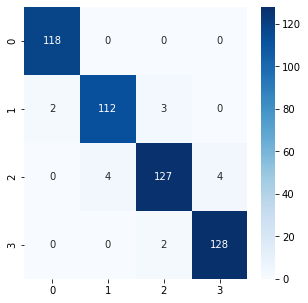

In [30]:
plt.figure(figsize = (5,5))
ax=sns.heatmap(mc, cmap="Blues", annot=True, fmt='d')


In [31]:
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

Accuracy: 97.33 %
Standard Deviation: 1.19 %
